In [1]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Test_Data=pd.read_csv('test_results.csv',sep=",")
User_Data=pd.read_csv('user_table.csv',sep=",")

In [3]:
Test_Data.head(5)


,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0


In [4]:
Test_Data.dtypes

user_id              int64
timestamp           object
source              object
device              object
operative_system    object
test                 int64
price                int64
converted            int64
dtype: object

In [5]:
User_Data.head(5)


,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68


In [6]:
User_Data.shape

(275616, 5)

In [7]:
Test_Data.shape

(316800, 8)

In [8]:
Test_Data.converted.value_counts()

0    310992
1      5808
Name: converted, dtype: int64

In [9]:
Test_Data.price.value_counts()

39    202672
59    114128
Name: price, dtype: int64

In [10]:
#agg({'Meidan_raised_amount_usd': 'sum'})
Conevred_based_on_test=Test_Data.groupby(['test'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

In [11]:
Conevred_based_on_price=Test_Data.groupby(['price'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

In [12]:
Conevred_based_on_test

,test,converted,percentage
0,0,0,98.009639
1,0,1,1.990361
2,1,0,98.445732
3,1,1,1.554268


In [13]:
Conevred_based_on_price

,price,converted,percentage
0,39,0,98.011072
1,39,1,1.988928
2,59,0,98.442976
3,59,1,1.557024


In [13]:

    
Clean_Test_Data = Test_Data.drop(Test_Data[(Test_Data.test ==0) & (Test_Data.price== 59)].index)   
Clean_Test_Data = Clean_Test_Data.drop(Clean_Test_Data[(Clean_Test_Data.test ==1) & (Clean_Test_Data.price== 39)].index) 




In [14]:
#Clean_Test_Datya = Test_Data[((Test_Data.test==0) and (Test_Data.price == 39)) | ((Test_Data.test==1) and (Test_Data.price == 59))]
#Clean_Test_Datya = Test_Data.loc[((Test_Data.test == 1) & (Test_Data.price == 59)), :]
Clean_Test_Data.shape

(316435, 8)

In [15]:
Df_merged = pd.merge(Clean_Test_Data, User_Data, on='user_id')
Df_merged.head()

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0,Fayetteville,USA,35.07,-78.90
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02


In [21]:
Df_merged.test.value_counts()


0    176241
1     99053
Name: test, dtype: int64

In [20]:
Df_merged.price.value_counts()

39    176241
59     99053
Name: price, dtype: int64

In [22]:
Ratio=Df_merged.groupby ("price")['price', 'converted'].mean()
Ratio

,price,converted
price,,
39,39.0,0.019768
59,59.0,0.015446


In [28]:
Ratio1=Df_merged.groupby ("price")['converted'].sum().rename("Total_sold_out")
Ratio1

price
39    3484
59    1530
Name: Total_sold_out, dtype: int64

In [32]:
Revenue=Ratio1.copy()
Revenue=Revenue.reset_index()
Revenue

,price,Total_sold_out
0,39,3484
1,59,1530


In [33]:
Revenue['Revenue']=Revenue['price']*Revenue['Total_sold_out']
Revenue

,price,Total_sold_out,Revenue
0,39,3484,135876
1,59,1530,90270


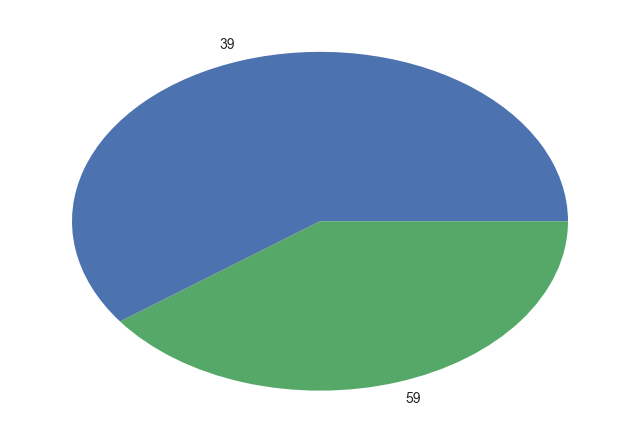

In [35]:
from matplotlib.pyplot import pie, axis, show
pie(Revenue['Revenue'], labels=Revenue.price);
show()

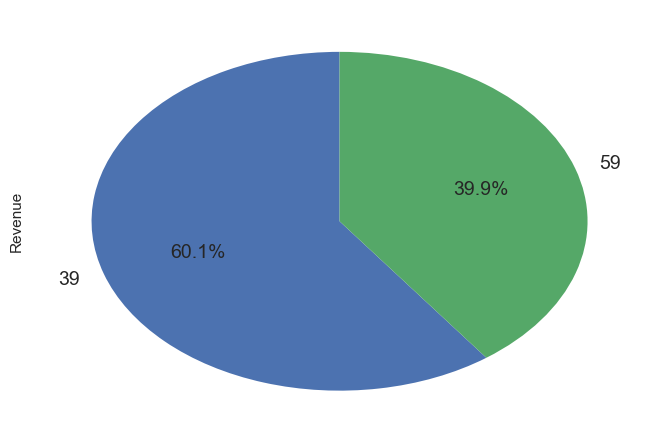

In [40]:
Revenue.plot(kind='pie', y = 'Revenue', autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=Revenue['price'], legend = False, fontsize=14)
plt.show()

In [23]:
Df_merged.converted.value_counts()

0    270280
1      5014
Name: converted, dtype: int64

In [19]:
Conevred_based_on_price=Clean_Test_Data.groupby(['price'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()
Conevred_based_on_test=Clean_Test_Data.groupby(['test'])['converted'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

In [20]:
Conevred_based_on_test

,test,converted,percentage
0,0,0,98.010044
1,0,1,1.989956
2,1,0,98.444495
3,1,1,1.555505


In [21]:
Conevred_based_on_price

,price,converted,percentage
0,39,0,98.010044
1,39,1,1.989956
2,59,0,98.444495
3,59,1,1.555505


In [41]:
Clean_Test_Data['timestamp']

'2015-05-08 03:38:34'

In [65]:
#Clean_Test_Data=Clean_Test_Data.drop(['newtimestamp'],axis=1)
#Clean_Test_Data

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
5,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0
6,600150,2015-03-04 14:45:44,seo_facebook,web,windows,0,39,0
7,798371,2015-03-15 08:19:29,ads-bing,mobile,android,1,59,1
8,447194,2015-03-28 12:28:10,ads_facebook,web,windows,1,59,0
9,431639,2015-04-24 12:42:18,ads_facebook,web,windows,1,59,0


In [66]:
import datetime
#Clean_Test_Data['newtimestamp']=str(Clean_Test_Data['timestamp'])
#Clean_Test_Data['timestamp'] =  datetime.datetime.strptime(str(Clean_Test_Data['timestamp']), '%Y-%m-%d').date()


def Convert_to_Datetime(row):
    #print (row['timestamp'])
    newdate=str(row['timestamp']).split( )
    #print (newdate[0])
    #input()
    return datetime.datetime.strptime(newdate[0], '%Y-%m-%d').date()
    

Clean_Test_Data['timestamp']=Clean_Test_Data.apply (lambda row: Convert_to_Datetime (row),axis=1)

Clean_Test_Data.head(5)



,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10,seo-google,mobile,android,0,39,0
2,317970,2015-04-04,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24,ads_facebook,web,mac,0,39,0


In [70]:
Clean_Test_Data=Clean_Test_Data.sort_values(['timestamp'], ascending=[True])
Clean_Test_Data.head(5)


,user_id,timestamp,source,device,operative_system,test,price,converted
127575,490436,2015-03-02,ads_facebook,mobile,android,0,39,0
115500,714035,2015-03-02,ads_facebook,mobile,iOS,0,39,0
73928,121121,2015-03-02,direct_traffic,mobile,android,1,59,0
310465,914328,2015-03-02,ads_other,web,windows,0,39,0
169012,467658,2015-03-02,ads-google,web,mac,0,39,0


In [150]:
Clean_Test_Data.user_id.nunique()

316435

In [152]:
Clean_Test_Data.shape

(316435, 8)

In [76]:
Time_range=Clean_Test_Data['timestamp'].max()-Clean_Test_Data['timestamp'].min()
Time_range

datetime.timedelta(90)

In [157]:
#df['cum_sum'] = df.val1.cumsum()
#df['cum_perc'] = 100*df.cum_sum/df.val1.sum()
#Results=Clean_Test_Data.groupby(by=['timestamp','source'])['converted'].cumsum().reset_index()
Results=Clean_Test_Data[['timestamp','converted','price']]
Results

,timestamp,converted,price
127575,2015-03-02,0,39
115500,2015-03-02,0,39
73928,2015-03-02,0,59
310465,2015-03-02,0,39
169012,2015-03-02,0,39
35351,2015-03-02,0,59
171843,2015-03-02,0,39
101535,2015-03-02,0,39
205098,2015-03-02,0,39
10788,2015-03-02,0,59


In [163]:

#Results["converted1"]=Results["converted"]
#Results=Results.drop(["converted"],axis=1)
Results.columns=['timestamp','price','converted']
Results.head(2)

,timestamp,price,converted
127575,2015-03-02,39,0
115500,2015-03-02,39,0


In [246]:
Price_39=Results[Results['price']==39]
Price_59=Results[Results['price']==59]

#New_Results = Results.groupby(['timestamp','price'])['converted'].cumsum()
#df.set_index(['name', 'day']).groupby(level=0, as_index=False).cumsum()
#New_Results

In [276]:
Price_39.head()

,timestamp,price,converted,Conv_cumsum
127575,2015-03-02,39,0,0
115500,2015-03-02,39,0,0
310465,2015-03-02,39,0,0
169012,2015-03-02,39,0,0
171843,2015-03-02,39,0,0


In [256]:
#Price_39['Conv-Cumsum']=Price_39.groupby(['timestamp'])['converted'].apply(lambda x: x.cumsum())
#Price_39.index=Price_39.timestamp
#Price_39=Price_39.drop(['level_0'],axis=1)
#Price_39=Price_39.drop(['timestamp'],axis=1)
#Price_39=Price_39.reset_index()
#Price_39['timestamp']=pd.to_datetime(Price_39['timestamp'])
#fisrtmonth=Price_39[Price_39['timestamp']=='2015-03-03']
#Price_39.dtypes
#Price_39['timestamp']
#fisrtmonth
Data_30=Price_39.groupby(['timestamp']).agg({'Conv_cumsum':'max'})
Data_59=Price_59.groupby(['timestamp']).agg({'Conv_cumsum':'max'})



In [264]:
Data_30.head()

,Conv_cumsum
timestamp,
2015-03-02,18
2015-03-03,21
2015-03-04,28
2015-03-05,46
2015-03-06,85


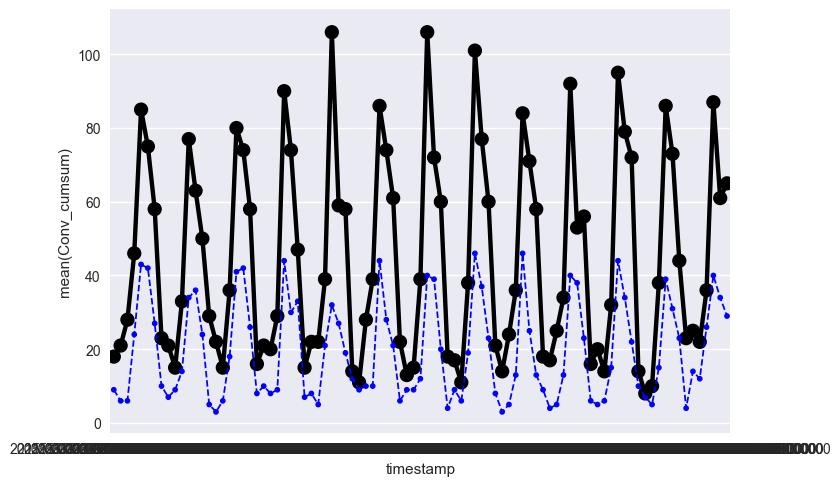

In [270]:
fig, ax = plt.subplots()
#f, ax = plt.subplots(1, 1)
x_col=Data_30.index
y_col = 'Conv_cumsum'
sns.pointplot(ax=ax,x=x_col,y=y_col,data=Data_30,color='Black')
sns.pointplot(ax=ax,x=x_col,y=y_col,data=Data_59,color='blue',linestyles='--', scale=0.4)
plt.show()

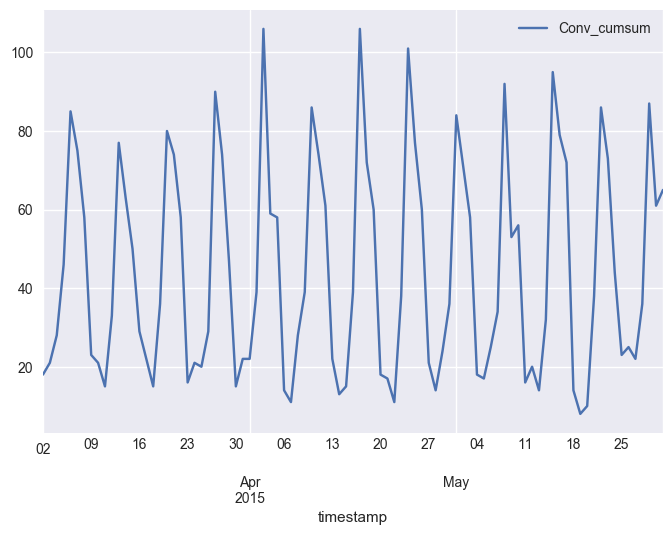

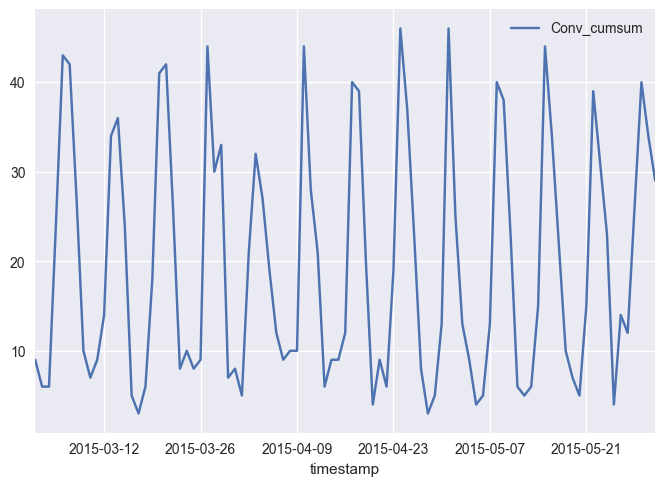

In [263]:
Data_30.plot()
Data_59.plot()
plt.show()

In [196]:
Price_39=Price_39.drop(['Conv-Cumsum'],axis=1)

In [179]:

Data_for_plot=Results.groupby(['timestamp','price'])['converted'].sum().reset_index()



In [ ]:
#data2 = data1.reset_index()
data3 = data2.set_index(["Bool", "Dir", "index"])   # index is the new column created by reset_index
running_sum = data3.groupby(level=[0,1,2]).sum().groupby(level=[0,1]).cumsum()

In [181]:
Data_for_plot.index=Data_for_plot['timestamp']
Data_for_plot=Data_for_plot.drop(['timestamp'],axis=1)

In [271]:
Data_for_plot.head()

,timestamp,price,converted
0,2015-03-02,39,18
1,2015-03-02,59,9
2,2015-03-03,39,21
3,2015-03-03,59,6
4,2015-03-04,39,28


In [184]:
#Data_for_plot['2015-03':'2015-05'].plot()
#Data_for_plot=Data_for_plot.drop(['index'],axis=1)
#Data_for_plot=Data_for_plot.reset_index()
Data_for_plot.head(5)

,price,converted
timestamp,,
2015-03-02,39,18
2015-03-02,59,9
2015-03-03,39,21
2015-03-03,59,6
2015-03-04,39,28


In [185]:
Data_for_plot=Data_for_plot.reset_index()
Data_for_plot.head(20)

,timestamp,price,converted
0,2015-03-02,39,18
1,2015-03-02,59,9
2,2015-03-03,39,21
3,2015-03-03,59,6
4,2015-03-04,39,28
5,2015-03-04,59,6
6,2015-03-05,39,46
7,2015-03-05,59,24
8,2015-03-06,39,85
9,2015-03-06,59,43


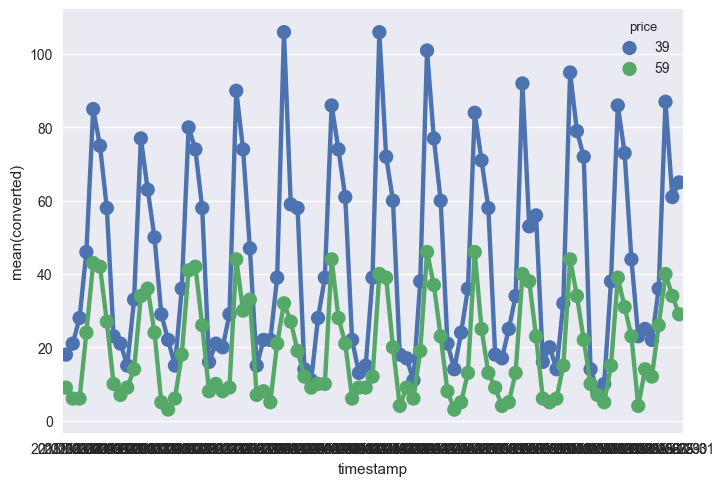

In [186]:
ax=sns.pointplot(x="timestamp", y="converted", hue="price",data=Data_for_plot)
plt.show()


In [272]:
#sns.factorplot(x="price", y="converted", data=Test_Data, kind="bar", ci=None, size=5)
#plt.xlabel('IsweekendRC')
#plt.ylabel('Profit')
#plt.show()

In [274]:
Result_final=Clean_Test_Data[['timestamp','converted','price','source','device','operative_system']]
Result_final.head()

,timestamp,converted,price,source,device,operative_system
127575,2015-03-02,0,39,ads_facebook,mobile,android
115500,2015-03-02,0,39,ads_facebook,mobile,iOS
73928,2015-03-02,0,59,direct_traffic,mobile,android
310465,2015-03-02,0,39,ads_other,web,windows
169012,2015-03-02,0,39,ads-google,web,mac


In [277]:
Price_39_final=Result_final[Result_final['price']==39]
Price_59_final=Result_final[Result_final['price']==59]

In [279]:
Price_39_final['Conv-Cumsum']=Price_39_final.groupby(['timestamp'])['converted'].apply(lambda x: x.cumsum())

/Users/fazelanjom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [280]:
Price_59_final['Conv-Cumsum']=Price_59_final.groupby(['timestamp'])['converted'].apply(lambda x: x.cumsum())

/Users/fazelanjom/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [283]:
Price_39_final.head()

,timestamp,converted,price,source,device,operative_system,Conv-Cumsum
127575,2015-03-02,0,39,ads_facebook,mobile,android,0
115500,2015-03-02,0,39,ads_facebook,mobile,iOS,0
310465,2015-03-02,0,39,ads_other,web,windows,0
169012,2015-03-02,0,39,ads-google,web,mac,0
171843,2015-03-02,0,39,seo-bing,mobile,android,0


In [286]:
Data_39_final=Price_39_final.groupby(['timestamp','source','device']).agg({'Conv-Cumsum':'max'})
Data_59_final=Price_59_final.groupby(['timestamp','source','device']).agg({'Conv-Cumsum':'max'})

In [289]:
Data_39_final=Data_39_final.reset_index()
Data_59_final=Data_59_final.reset_index()

In [291]:
Data_59_final.device.value_counts()

mobile    1069
web       1052
Name: device, dtype: int64

In [295]:
Data_59_final.source.value_counts()

ads_facebook       182
ads_other          182
direct_traffic     182
seo_facebook       182
seo-google         182
ads-bing           182
ads-google         182
friend_referral    181
seo-other          180
ads-yahoo          176
seo-yahoo          171
seo-bing           139
Name: source, dtype: int64

In [292]:
Data_59_final.head()

,timestamp,source,device,Conv-Cumsum
0,2015-03-02,ads-bing,mobile,9
1,2015-03-02,ads-bing,web,8
2,2015-03-02,ads-google,mobile,9
3,2015-03-02,ads-google,web,9
4,2015-03-02,ads-yahoo,mobile,9


In [326]:
Data_59_final['timestamp'][62].weekday()

2

In [334]:
Data_59_final

,timestamp,source,device,Conv-Cumsum
0,2015-03-02,ads-bing,mobile,9
1,2015-03-02,ads-bing,web,8
2,2015-03-02,ads-google,mobile,9
3,2015-03-02,ads-google,web,9
4,2015-03-02,ads-yahoo,mobile,9
5,2015-03-02,ads-yahoo,web,8
6,2015-03-02,ads_facebook,mobile,9
7,2015-03-02,ads_facebook,web,9
8,2015-03-02,ads_other,mobile,9
9,2015-03-02,ads_other,web,9
